# Analysis

This notebook presents execution and results from:

* Base case analysis
* Scenario analysis
* Sensitivity analysis

The run time is provided at the end of the notebook.

Credit:

* Analysis of the spread of replication results was adapted from Tom Monks (2024) HPDM097 - Making a difference with health data (https://github.com/health-data-science-OR/stochastic_systems) (MIT Licence).

## Set-up

Load notebook linters.

In [1]:
%load_ext pycodestyle_magic

In [2]:
%pycodestyle_on

Load required packages.

In [3]:
# To ensure any updates to `simulation/` are fetched without needing to restart
# the notebook environment, reload `simulation/` before execution of each cell
%load_ext autoreload
%autoreload 1
%aimport simulation

In [4]:
import os
import pandas as pd
import plotly.express as px
import plotly.io as pio
import time

from simulation.logging import SimLogger
from simulation.model import (
    Defaults, Model, Runner, summary_stats, run_scenarios)

Display plotly express figures as non-interactive figures. This means they will be visible when browsing the notebooks on GitHub. To switch these back to interactive figures, simply remove this line.

In [5]:
pio.renderers.default = 'svg'

Start timer.

In [6]:
start_time = time.time()

Define path to outputs folder.

In [7]:
output_dir = '../outputs/'

## Default run

Run with default parameters.

In [8]:
param = Defaults()
experiment = Runner(param)
experiment.run_reps()

Preview results and save to `.csv` files.

Patient-level results are a large file, so that could be compressed and saved as `.csv.gz`:

```
# Save file
experiment.patient_results_df.to_csv(
    os.path.join(output_dir, 'example_patient.csv.gz'),
    index=False, compression='gzip')

# Load file
pd.read_csv('filename.csv.gz', compression='gzip
```

However, in may cases, it may not be necessary to save this file - and may be more appropriate to just save the later results.

In [9]:
display(experiment.patient_results_df.head())

,patient_id,arrival_time,q_time_nurse,time_with_nurse,run
0,1,18720.556711,0.0,1.551695,0
1,2,18724.792565,0.0,3.649895,0
2,3,18725.627670,0.0,8.137105,0
3,4,18728.774983,0.0,22.057543,0
4,5,18729.812428,0.0,15.439297,0


In [10]:
display(experiment.run_results_df.head())
experiment.run_results_df.to_csv(
    os.path.join(output_dir, 'example_run.csv'), index=False)

,run_number,scenario,arrivals,mean_q_time_nurse,mean_time_with_nurse,mean_nurse_utilisation,mean_nurse_utilisation_tw,mean_nurse_q_length
0,0,0,10972,0.504541,9.842268,0.499639,0.499740,0.128144
1,1,0,10784,0.514151,10.060481,0.501991,0.502069,0.128347
2,2,0,10854,0.523235,9.925025,0.498130,0.498260,0.132669
3,3,0,10831,0.479149,9.937057,0.498220,0.498269,0.120131
4,4,0,10720,0.461457,10.015904,0.496870,0.497106,0.114510


In [11]:
display(experiment.interval_audit_df.head())
experiment.interval_audit_df.to_csv(
    os.path.join(output_dir, 'example_interval_audit.csv'), index=False)

,resource_name,simulation_time,utilisation,queue_length,running_mean_wait_time,run
0,nurse,18720,0.6,0,0.427625,0
1,nurse,18840,0.4,0,0.425181,0
2,nurse,18960,0.6,0,0.423041,0
3,nurse,19080,1.0,3,0.427408,0
4,nurse,19200,0.6,0,0.440854,0


In [12]:
display(experiment.overall_results_df.head())
experiment.overall_results_df.to_csv(
    os.path.join(output_dir, 'example_overall.csv'), index=False)

,arrivals,mean_q_time_nurse,mean_time_with_nurse,mean_nurse_utilisation,mean_nurse_utilisation_tw,mean_nurse_q_length
mean,10776.741935,0.499037,9.978457,0.497670,0.497804,0.124599
std_dev,115.803272,0.067393,0.115138,0.007524,0.007541,0.017213
lower_95_ci,10734.264952,0.474317,9.936224,0.494910,0.495038,0.118285
upper_95_ci,10819.218919,0.523757,10.020690,0.500430,0.500570,0.130912


## View spread of results across replications

In [13]:
def plot_results_spread(column, x_label, file):
    """
    Plot spread of results from across replications, for chosen column.
    Show figure and save under specified file name.

    Arguments:
        column (str):
            Name of column to plot.
        x_label (str):
            X axis label.
        file (str):
            Filename to save figure to.
    """
    fig = px.histogram(experiment.run_results_df, x=column)
    fig.update_layout(
        xaxis_title=x_label,
        yaxis_title='Frequency'
    )

    # Show figure
    fig.show()

    # Save figure
    fig.write_image(os.path.join(output_dir, file))

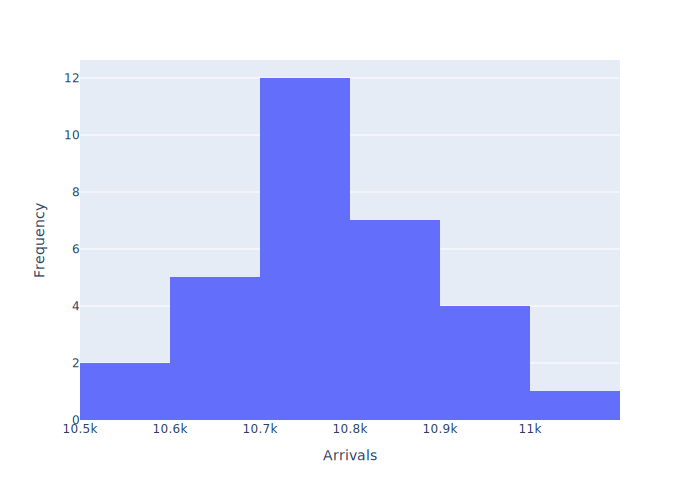

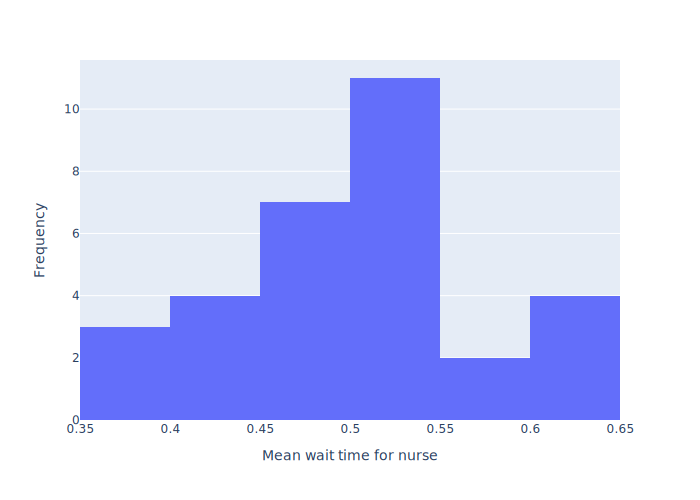

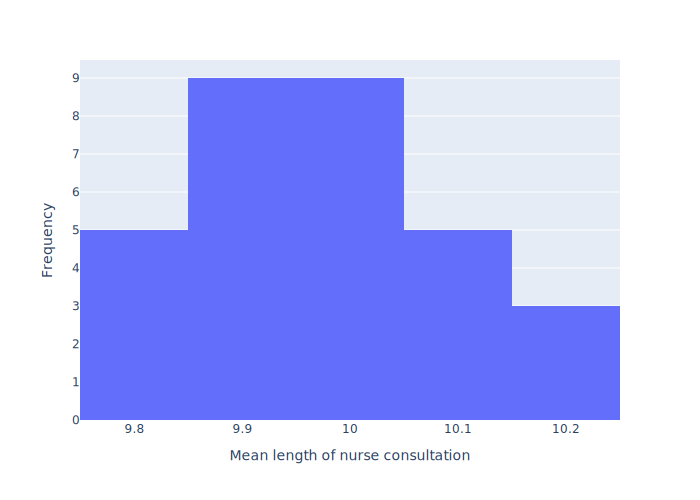

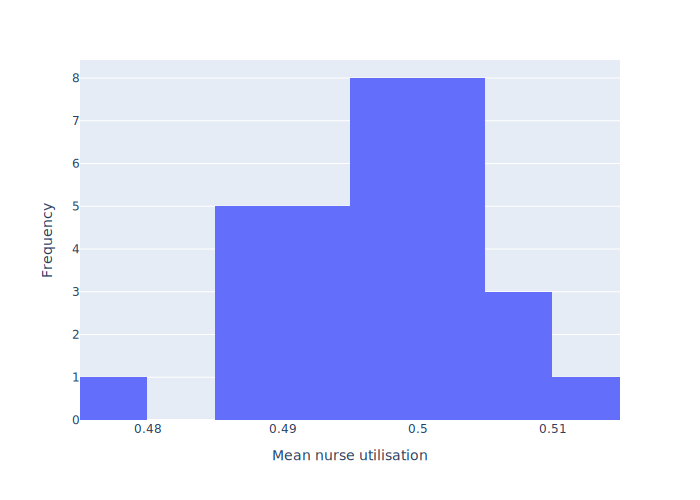

In [14]:
plot_results_spread(
    column='arrivals',
    x_label='Arrivals',
    file='spread_arrivals.png')

plot_results_spread(
    column='mean_q_time_nurse',
    x_label='Mean wait time for nurse',
    file='spread_nurse_wait.png')

plot_results_spread(
    column='mean_time_with_nurse',
    x_label='Mean length of nurse consultation',
    file='spread_nurse_time.png')

plot_results_spread(
    column='mean_nurse_utilisation',
    x_label='Mean nurse utilisation',
    file='spread_nurse_util.png')

## Scenario analysis

We can use the `run_scenarios()` function to run scenarios on the default model, executing it with every possible combination of the specified parameters.

In [15]:
# Run scenarios
scenario_results = run_scenarios({
    'patient_inter': [3, 4, 5, 6, 7],
    'number_of_nurses': [5, 6, 7, 8]
    })

There are 20 scenarios. Running:
{'patient_inter': 3, 'number_of_nurses': 5}
{'patient_inter': 3, 'number_of_nurses': 6}
{'patient_inter': 3, 'number_of_nurses': 7}
{'patient_inter': 3, 'number_of_nurses': 8}
{'patient_inter': 4, 'number_of_nurses': 5}
{'patient_inter': 4, 'number_of_nurses': 6}
{'patient_inter': 4, 'number_of_nurses': 7}
{'patient_inter': 4, 'number_of_nurses': 8}
{'patient_inter': 5, 'number_of_nurses': 5}
{'patient_inter': 5, 'number_of_nurses': 6}
{'patient_inter': 5, 'number_of_nurses': 7}
{'patient_inter': 5, 'number_of_nurses': 8}
{'patient_inter': 6, 'number_of_nurses': 5}
{'patient_inter': 6, 'number_of_nurses': 6}
{'patient_inter': 6, 'number_of_nurses': 7}
{'patient_inter': 6, 'number_of_nurses': 8}
{'patient_inter': 7, 'number_of_nurses': 5}
{'patient_inter': 7, 'number_of_nurses': 6}
{'patient_inter': 7, 'number_of_nurses': 7}
{'patient_inter': 7, 'number_of_nurses': 8}


In [16]:
scenario_results.head()

,run_number,scenario,arrivals,mean_q_time_nurse,mean_time_with_nurse,mean_nurse_utilisation,mean_nurse_utilisation_tw,mean_nurse_q_length,patient_inter,number_of_nurses
0,0,0,14491,1.906132,9.949058,0.667461,0.667636,0.639392,3,5
1,1,0,14406,1.918952,10.148115,0.676693,0.677008,0.640044,3,5
2,2,0,14465,1.976377,9.931685,0.665045,0.665109,0.661766,3,5
3,3,0,14424,1.959961,10.003235,0.667725,0.667792,0.655062,3,5
4,4,0,14387,1.780232,9.980463,0.664761,0.664891,0.592875,3,5


Example plots...

In [17]:
def plot_scenario(results, x_var, result_var, colour_var, xaxis_title,
                  yaxis_title, legend_title):
    """
    Plot results from different model scenarios.

    Arguments:
        results (pd.DataFrame):
            Contains results to plot.
        x_var (str):
            Name of variable to plot on X axis.
        result_var (str):
            Name of variable with results, to plot on Y axis.
        colour_var (str|None):
            Name of variable to colour lines with (or set to None).
        xaxis_title (str):
            Title for X axis.
        yaxis_title (str):
            Title for Y axis.
        legend_title (str):
            Title for figure legend.
    """
    # If x_var and colour_var are provided, combine both in a list to use
    # as grouping variables when calculating average results
    if colour_var is not None:
        group_vars = [x_var, colour_var]
    else:
        group_vars = [x_var]

    # Calculate average results from each scenario
    df = (
        results
        .groupby(group_vars)[result_var]
        .apply(summary_stats)
        .apply(pd.Series)
        .reset_index()
    )
    df.columns = (list(df.columns[:-4]) +
                  ['mean', 'std_dev', 'ci_lower', 'ci_upper'])

    # Plot mean line
    fig = px.line(df, x=x_var, y='mean', color=colour_var)
    fig.update_layout(
        xaxis_title=xaxis_title,
        yaxis_title=yaxis_title,
        legend_title_text=legend_title
    )

    # Plot confidence interval lines
    for ci in ['ci_upper', 'ci_lower']:
        trace = (px.line(df, x=x_var, y=ci, color=colour_var)
                 .update_traces(opacity=0.5, showlegend=False)
                 .select_traces())
        # Add to figure
        fig.add_traces(list(trace))

    return df, fig

Mean wait time for nurse from scenarios with varying patient inter-arrival times and number of nurses.

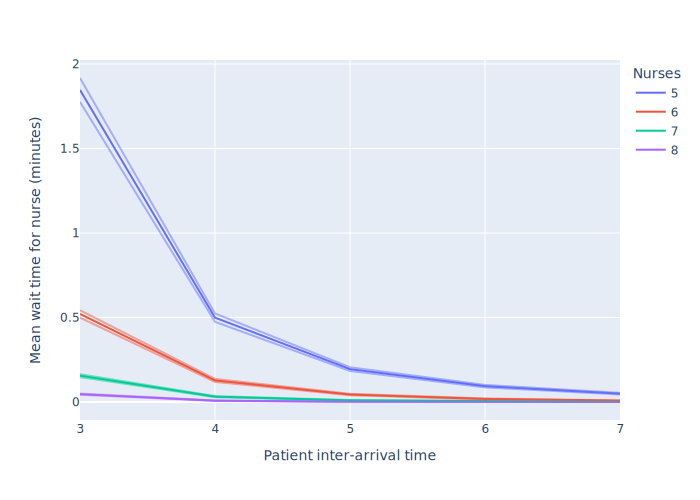

In [18]:
result, fig = plot_scenario(
    results=scenario_results,
    x_var='patient_inter',
    result_var='mean_q_time_nurse',
    colour_var='number_of_nurses',
    xaxis_title='Patient inter-arrival time',
    yaxis_title='Mean wait time for nurse (minutes)',
    legend_title='Nurses')

fig.show()

fig.write_image(os.path.join(output_dir, 'scenario_nurse_wait.png'))

Mean nurse utilisation with those varying scenarios.

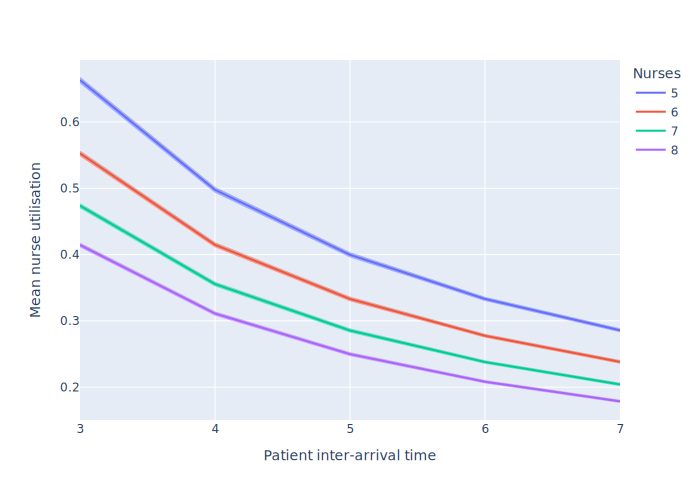

In [19]:
result, fig = plot_scenario(
    results=scenario_results,
    x_var='patient_inter',
    result_var='mean_nurse_utilisation',
    colour_var='number_of_nurses',
    xaxis_title='Patient inter-arrival time',
    yaxis_title='Mean nurse utilisation',
    legend_title='Nurses')

fig.show()

fig.write_image(os.path.join(output_dir, 'scenario_nurse_util.png'))

Example table...

In [20]:
table = result.copy()

# Combine mean and CI into single column, and round
table['mean_ci'] = table.apply(
    lambda row:
    f'{row['mean']:.2f} ({row['ci_lower']:.2f}, {row['ci_upper']:.2f})', axis=1
)

# Convert from long to wide format
table = (
    table
    .pivot(index='patient_inter', columns='number_of_nurses', values='mean_ci')
    .rename_axis('Patient inter-arrival time', axis='index')
    .rename_axis('Number of nurses', axis='columns')
)

# Convert to latex, display and save
table_latex = table.to_latex()
print(table_latex)
with open(os.path.join(output_dir, 'scenario_nurse_util.tex'), 'w') as tf:
    tf.write(table_latex)

\begin{tabular}{lllll}
\toprule
Number of nurses & 5 & 6 & 7 & 8 \\
Patient inter-arrival time &  &  &  &  \\
\midrule
3 & 0.66 (0.66, 0.67) & 0.55 (0.55, 0.56) & 0.47 (0.47, 0.48) & 0.41 (0.41, 0.42) \\
4 & 0.50 (0.49, 0.50) & 0.41 (0.41, 0.42) & 0.36 (0.35, 0.36) & 0.31 (0.31, 0.31) \\
5 & 0.40 (0.40, 0.40) & 0.33 (0.33, 0.34) & 0.29 (0.28, 0.29) & 0.25 (0.25, 0.25) \\
6 & 0.33 (0.33, 0.33) & 0.28 (0.28, 0.28) & 0.24 (0.24, 0.24) & 0.21 (0.21, 0.21) \\
7 & 0.29 (0.28, 0.29) & 0.24 (0.24, 0.24) & 0.20 (0.20, 0.21) & 0.18 (0.18, 0.18) \\
\bottomrule
\end{tabular}



## Sensitivity analysis

Can use similar code to perform sensitivity analyses.

**How does sensitivity analysis differ from scenario analysis?**

* Scenario analysis focuses on a set of predefined situations which are plausible or relevant to the problem being studied. It can often involve varying multiple parameters simulatenously. The purpose is to understand how the system operates under different hypothetical scenarios.
* Sensitivity analysis varies one (or a small group) of parameters and assesses the impact of small changes in that parameter on outcomes. The purpose is to understand how uncertainty in the inputs affects the model, and how robust results are to variation in those inputs.

In [21]:
# Run scenarios
sensitivity_consult = run_scenarios({
    'mean_n_consult_time': [8, 9, 10, 11, 12, 13, 14, 15]
})

There are 8 scenarios. Running:
{'mean_n_consult_time': 8}
{'mean_n_consult_time': 9}
{'mean_n_consult_time': 10}
{'mean_n_consult_time': 11}
{'mean_n_consult_time': 12}
{'mean_n_consult_time': 13}
{'mean_n_consult_time': 14}
{'mean_n_consult_time': 15}


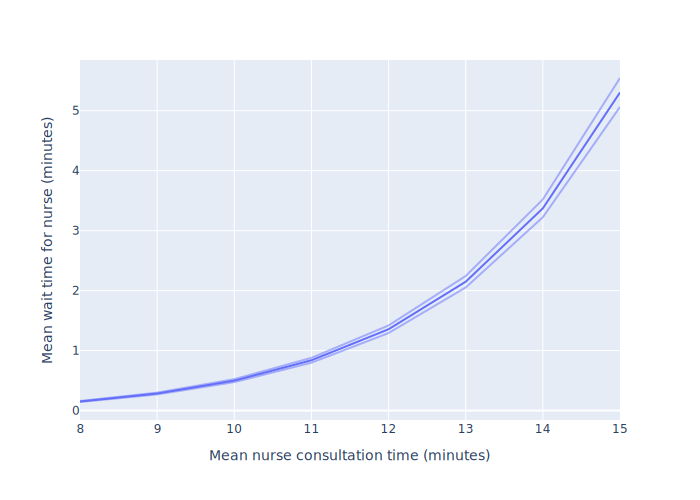

In [22]:
result, fig = plot_scenario(
    results=sensitivity_consult,
    x_var='mean_n_consult_time',
    result_var='mean_q_time_nurse',
    colour_var=None,
    xaxis_title='Mean nurse consultation time (minutes)',
    yaxis_title='Mean wait time for nurse (minutes)',
    legend_title='Nurses'
)

fig.show()

fig.write_image(os.path.join(output_dir, 'sensitivity_consult_time.png'))

In [23]:
table = result.copy()

# Combine mean and CI into single column, and round
table['mean_ci'] = table.apply(
    lambda row:
    f'{row['mean']:.2f} ({row['ci_lower']:.2f}, {row['ci_upper']:.2f})', axis=1
)

# Select relevant columns and rename
cols = {
    'mean_n_consult_time': 'Mean nurse consultation time',
    'mean_ci': 'Mean wait time for nurse (95 percent confidence interval)'
}
table = table[cols.keys()].rename(columns=cols)

# Convert to latex, display and save
table_latex = table.to_latex()
print(table_latex)
with open(os.path.join(output_dir, 'sensitivity_consult_time.tex'), 'w') as tf:
    tf.write(table_latex)

\begin{tabular}{lrl}
\toprule
 & Mean nurse consultation time & Mean wait time for nurse (95 percent confidence interval) \\
\midrule
0 & 8 & 0.15 (0.14, 0.16) \\
1 & 9 & 0.28 (0.27, 0.30) \\
2 & 10 & 0.50 (0.47, 0.52) \\
3 & 11 & 0.84 (0.80, 0.88) \\
4 & 12 & 1.36 (1.29, 1.42) \\
5 & 13 & 2.15 (2.05, 2.24) \\
6 & 14 & 3.37 (3.22, 3.52) \\
7 & 15 & 5.30 (5.06, 5.54) \\
\bottomrule
\end{tabular}



## NaN results

Note: In this model, if patients are still waiting to be seen at the end of the simulation, they will have NaN results.

In [24]:
param = Defaults()
param.patient_inter = 2
nan_experiment = Runner(param)
nan_experiment.run_reps()
nan_experiment.patient_results_df.tail()

,patient_id,arrival_time,q_time_nurse,time_with_nurse,run
667686,21586,61913.030043,NaN,NaN,30
667687,21587,61915.384561,NaN,NaN,30
667688,21588,61915.421934,NaN,NaN,30
667689,21589,61917.817910,NaN,NaN,30
667690,21590,61919.845349,NaN,NaN,30


## Example run with logs

The `SimLogger` class is used to log events during the simulation. These can be print to the console (`log_to_console`) or saved to a file (`log_to_file`).

This will output lots of information to the screen - currently set to give information on each patient as they arrive and then see the nurse. Therefore, it is only best used when running the simulation for a short time with few patients.

The logs in `model.py` can be altered to print your desired information during the simulation run, which can be helpful during development.

In [25]:
# Mini run of simulation with logger enabled
param = Defaults()
param.warm_up_period = 50
param.data_collection_period = 100
param.number_of_runs = 1
param.cores = 0
param.logger = SimLogger(log_to_console=True, log_to_file=False)

model = Model(param, run_number=0)
model.run()

2025-01-28 16:40:27,536 - INFO - logging.py:log():128 - Initialised model: {'param': <simulation.model.Defaults object at 0x7d54ec9f12e0>, 'run_number': 0, 'env': <simpy.core.Environment object at 0x7d54ec8cee40>, 'nurse': <simulation.model.MonitoredResource object at 0x7d54ec8cea50>, 'patients': [], 'nurse_time_used': 0, 'nurse_consult_count': 0, 'running_mean_nurse_wait': 0, 'audit_list': [], 'results_list': [], 'patient_inter_arrival_dist': <simulation.model.Exponential object at 0x7d54ec8cf8c0>, 'nurse_consult_time_dist': <simulation.model.Exponential object at 0x7d54e39ad590>}
2025-01-28 16:40:27,541 - INFO - logging.py:log():128 - Parameters: {'_initialising': False, 'patient_inter': 4, 'mean_n_consult_time': 10, 'number_of_nurses': 5, 'warm_up_period': 50, 'data_collection_period': 100, 'number_of_runs': 1, 'audit_interval': 120, 'scenario_name': 0, 'cores': 0, 'logger': <simulation.logging.SimLogger object at 0x7d54e39fdd30>}
2025-01-28 16:40:27,545 - INFO - logging.py:log():12

This will align with the recorded results of each patient (though we only save those that arrive after the warm-up period).

In [26]:
# Compare to patient-level results
model.results_list

[{'patient_id': 1,
  'arrival_time': 51.90400587259546,
  'q_time_nurse': 0.0,
  'time_with_nurse': 18.07891954142075},
 {'patient_id': 2,
  'arrival_time': 51.963434706622714,
  'q_time_nurse': 0.0,
  'time_with_nurse': 3.1020092355006064},
 {'patient_id': 3,
  'arrival_time': 74.3494580155259,
  'q_time_nurse': 0.0,
  'time_with_nurse': 26.744513862017026},
 {'patient_id': 4,
  'arrival_time': 77.53382703300574,
  'q_time_nurse': 0.0,
  'time_with_nurse': 0.7481033661053572},
 {'patient_id': 5,
  'arrival_time': 78.93233230430721,
  'q_time_nurse': 0.0,
  'time_with_nurse': 0.5277574384602378},
 {'patient_id': 6,
  'arrival_time': 86.81473043550623,
  'q_time_nurse': 0.0,
  'time_with_nurse': 2.4349563515001904},
 {'patient_id': 7,
  'arrival_time': 89.78326290873765,
  'q_time_nurse': 0.0,
  'time_with_nurse': 9.665598479334754},
 {'patient_id': 8,
  'arrival_time': 89.80720556833339,
  'q_time_nurse': 0.0,
  'time_with_nurse': 7.004542644523265},
 {'patient_id': 9,
  'arrival_time'

## Run time

In [27]:
# Get run time in seconds
end_time = time.time()
runtime = round(end_time - start_time)

# Display converted to minutes and seconds
print(f'Notebook run time: {runtime // 60}m {runtime % 60}s')

Notebook run time: 1m 6s
